# Scapulo-Humeral Computation
- [github link](https://github.com/romainmartinez/SHR)

In [1]:
# Common imports
import scipy.io as sio
import numpy as np
import spm1d

# Figures
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# to make this notebook's output stable across runs
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [2]:
DATA_PATH = './data/'
DATA_FORMAT = 'mat_without_correction_10hz'

AREA = np.arange(1, 100)

## 0. import data

In [3]:
mat = sio.loadmat(f'{DATA_PATH}{DATA_FORMAT}.mat')['data']

In [4]:
y, TH, weight, participants, sex = [mat[i][0][0] for i in ['y', 'TH', 'weight', 'participants', 'sex']]

# keep only AREA
y = y[:, AREA].copy()

# reshape to vector
weight, participants, sex = [i.flatten() for i in [weight, participants, sex]]

In [5]:
# replace nan by mean of same sex/weight
for isex in np.unique(sex):
    for iweight in np.unique(weight):
        idx = ((sex == isex) & (weight == iweight)).flatten()
        mean_vector = np.nanmean(y[idx, :], axis=0)
        y[idx, :] = np.where(np.isnan(y[idx, :]), mean_vector, y[idx, :])

## 1. stats

In [6]:
alpha = 0.05
iterations = 10000

a_spm = spm1d.stats.nonparam.anova2(y, sex, weight)
a_spmi = a_spm.inference(alpha, iterations=iterations)
print(a_spmi)

SnPM{F} inference list
   design      :  ANOVA2
   nEffects    :  3
   nPermUnique :  -1 permutations possible
Effects:
   A     z=(1x99) array       h0reject=True
   B     z=(1x99) array       h0reject=True
   AB    z=(1x99) array       h0reject=False



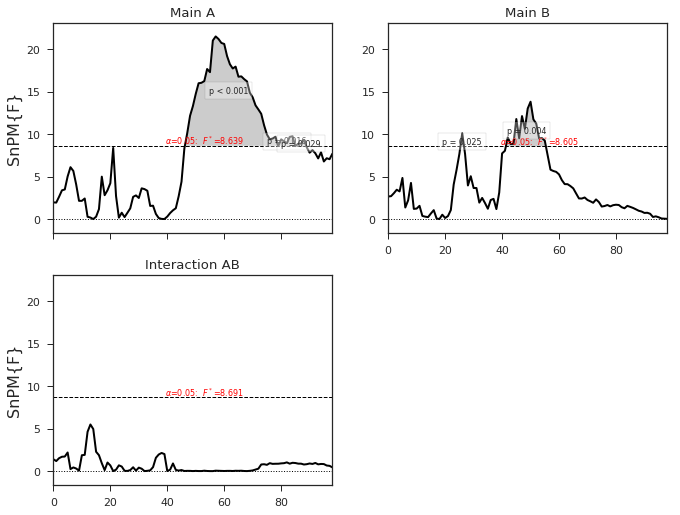

In [7]:
fig, ax = plt.subplots(figsize=(11, 8.5))

a_spmi.plot(plot_threshold_label=True, plot_p_values=True, autoset_ylim=True)
plt.show()

fig.savefig(f'./share/fig/spm.pdf', transparent=True)

In [8]:
a_spmi.print_verbose()

SnPM{F} inference list
   design      :  ANOVA2
   nEffects    :  3
   nPermUnique :  -1 permutations possible

SnPM{F} inference field
   SPM.effect         :  Main A
   SPM.z              :  (1x99) raw test stat field
   SnPM.nPermUnique   :  -1 permutations possible
Inference:
   SPM.alpha          :  0.050
   SPM.zstar          :  8.63889
   SPM.h0reject       :  True
   SPM.p              :  (<0.001, 0.016, 0.029)

SnPM{F} inference field
   SPM.effect         :  Main B
   SPM.z              :  (1x99) raw test stat field
   SnPM.nPermUnique   :  -1 permutations possible
Inference:
   SPM.alpha          :  0.050
   SPM.zstar          :  8.60502
   SPM.h0reject       :  True
   SPM.p              :  (0.025, 0.004)

SnPM{F} inference field
   SPM.effect         :  Interaction AB
   SPM.z              :  (1x99) raw test stat field
   SnPM.nPermUnique   :  -1 permutations possible
Inference:
   SPM.alpha          :  0.050
   SPM.zstar          :  8.69110
   SPM.h0reject       :  False


In [15]:
a_spmi[0].clusters

[Cluster (NonParam)
    threshold       :  8.639
    centroid        :  (61.607, 15.091)
    isinterpolated  :  True
    iswrapped       :  False
    endpoints       :  (46.183, 78.964)
    extent          :  32.782
    metric          :  ClusterIntegral
    metric_value    :  219.36178
    nPermUnique     :  -1 unique permutations possible
    nPermActual     :  10000 actual permutations
    P               :  0.00033
 , Cluster (NonParam)
    threshold       :  8.639
    centroid        :  (82.022, 9.171)
    isinterpolated  :  True
    iswrapped       :  False
    endpoints       :  (79.049, 84.968)
    extent          :  5.919
    metric          :  ClusterIntegral
    metric_value    :  3.72603
    nPermUnique     :  -1 unique permutations possible
    nPermActual     :  10000 actual permutations
    P               :  0.01593
 , Cluster (NonParam)
    threshold       :  8.639
    centroid        :  (86.996, 8.876)
    isinterpolated  :  True
    iswrapped       :  False
    endpo

In [17]:
a_spmi[1].clusters

[Cluster (NonParam)
    threshold       :  8.605
    centroid        :  (26.000, 9.105)
    isinterpolated  :  True
    iswrapped       :  False
    endpoints       :  (25.383, 26.616)
    extent          :  1.233
    metric          :  ClusterIntegral
    metric_value    :  1.49945
    nPermUnique     :  -1 unique permutations possible
    nPermActual     :  10000 actual permutations
    P               :  0.02483
 , Cluster (NonParam)
    threshold       :  8.605
    centroid        :  (48.556, 10.425)
    isinterpolated  :  True
    iswrapped       :  False
    endpoints       :  (41.354, 55.370)
    extent          :  14.016
    metric          :  ClusterIntegral
    metric_value    :  29.12207
    nPermUnique     :  -1 unique permutations possible
    nPermActual     :  10000 actual permutations
    P               :  0.00443
 ]

/home/romain/miniconda3/envs/envergo/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in greater_equal


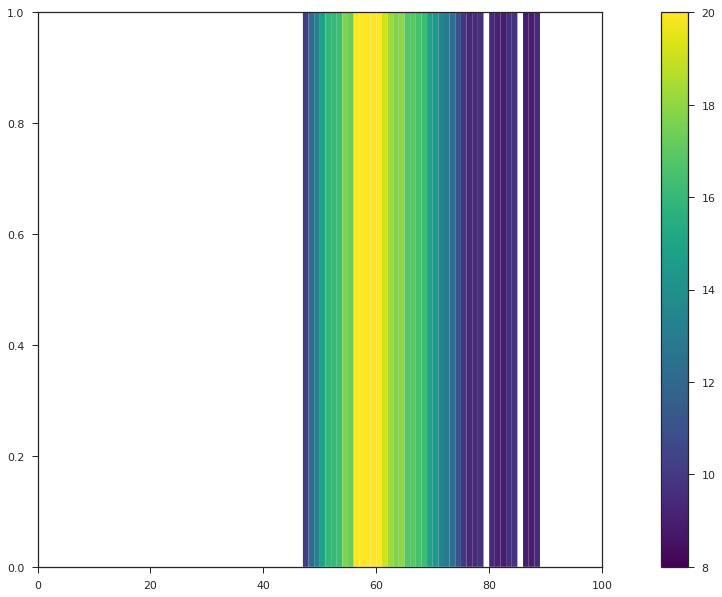

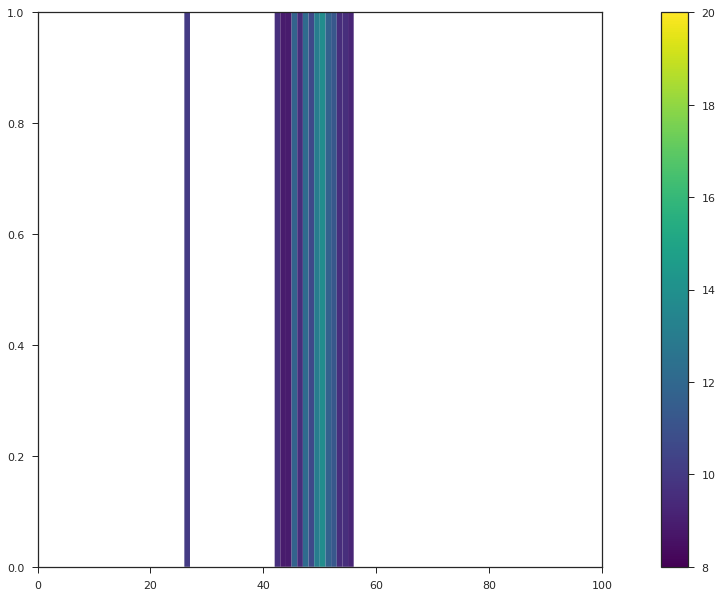

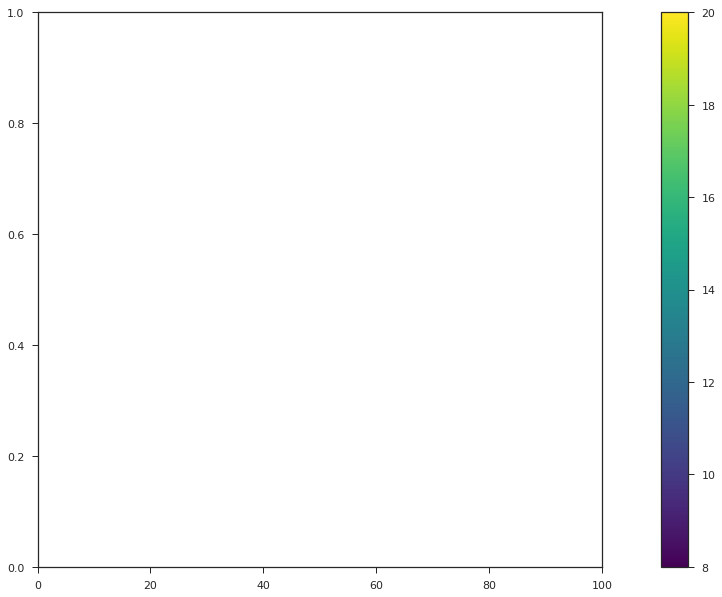

In [19]:
for i in range(len(a_spmi)):
    fig, ax = plt.subplots(figsize=(11, 8.5))

    z = a_spmi[i].z

    signi = np.abs(a_spmi[i].z) >= a_spmi[i].zstar

    z[~signi] = np.nan

    plot_array = np.ma.masked_where(np.isnan(z),z).reshape(1, -1)

    plt.pcolor(plot_array, cmap='viridis', antialiased=True,
               vmin=8, vmax=20)

    plt.colorbar(pad=.08)

    ax.xaxis.set_ticks(np.linspace(0, 100, num=6))

    fig.tight_layout()
    plt.show()

    fig.savefig(f'./share/fig/{a_spmi[i].effect}.pdf', transparent=True)

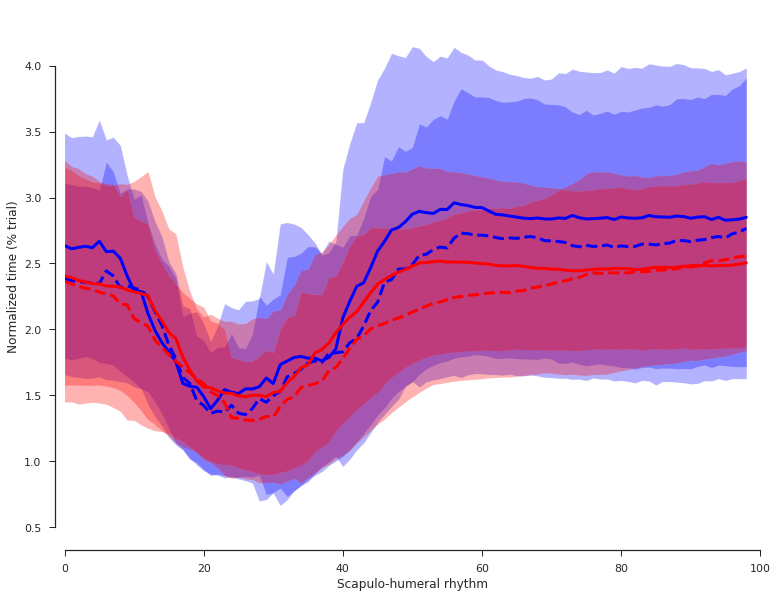

In [124]:
fig, ax = plt.subplots(figsize=(11, 8.5))

spm1d.plot.plot_mean_sd(y[(sex == 1) & (weight == 6), :],
                        linecolor='b', facecolor='b', alpha=.3)
spm1d.plot.plot_mean_sd(y[(sex == 1) & (weight == 12), :],
                        linecolor='b', linestyle='--', facecolor='b', alpha=.3)
spm1d.plot.plot_mean_sd(y[(sex == 2) & (weight == 6), :],
                        linecolor='r', facecolor='r', alpha=.3)
spm1d.plot.plot_mean_sd(y[(sex == 2) & (weight == 12), :],
                        linecolor='r', linestyle='--', facecolor='r', alpha=.3)

ax.set_ylabel('Scapulo-humeral rhythm')
ax.set_xlabel('Normalized time (% trial)')
ax.xaxis.set_ticks(np.linspace(0, 100, num=6))

sns.despine(offset=10, trim=True)
fig.tight_layout()

fig.savefig(f'./share/fig/rhythm.pdf', transparent=True)

plt.show()

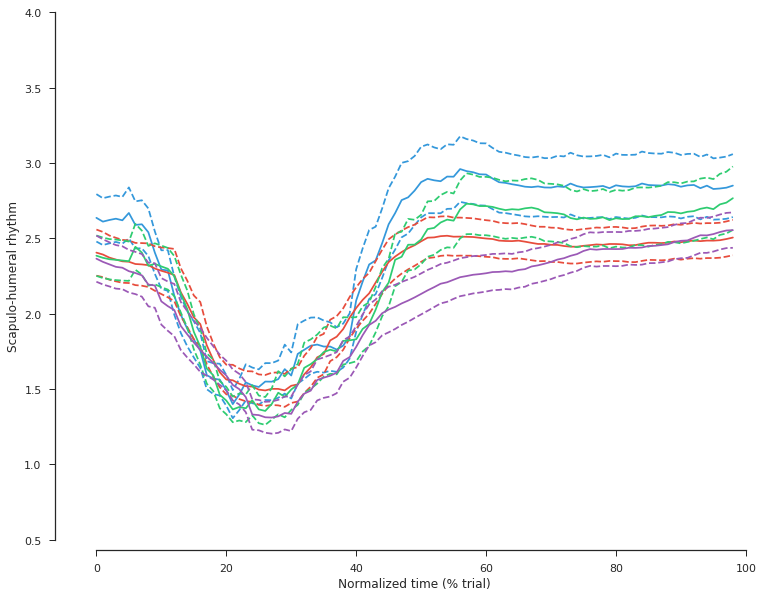

In [7]:
N = 58

fig, ax = plt.subplots(figsize=(11, 8.5))

mean_men_6 = np.mean(y[(sex == 1) & (weight == 6), :], axis=0)
std_men_6 = np.std(y[(sex == 1) & (weight == 6), :], axis=0)
mean_men_12 = np.mean(y[(sex == 1) & (weight == 12), :], axis=0)
std_men_12 = np.std(y[(sex == 1) & (weight == 12), :], axis=0)

mean_women_6 = np.mean(y[(sex == 2) & (weight == 6), :], axis=0)
std_women_6 = np.std(y[(sex == 2) & (weight == 6), :], axis=0)
mean_women_12 = np.mean(y[(sex == 2) & (weight == 12), :], axis=0)
std_women_12 = np.std(y[(sex == 2) & (weight == 6), :], axis=0)

plt.plot(mean_men_6, color='#3498db')
plt.plot(mean_men_6 - std_men_6/np.sqrt(N/2), color='#3498db', linestyle='--')
plt.plot(mean_men_6 + std_men_6/np.sqrt(N/2), color='#3498db', linestyle='--')

plt.plot(mean_women_6, color='#e74c3c')
plt.plot(mean_women_6 - std_women_6/np.sqrt(N/2), color='#e74c3c', linestyle='--')
plt.plot(mean_women_6 + std_women_6/np.sqrt(N/2), color='#e74c3c', linestyle='--')



plt.plot(mean_men_12, color='#2ecc71')
plt.plot(mean_men_12 - std_men_12/np.sqrt(N/2), color='#2ecc71', linestyle='--')
plt.plot(mean_men_12 + std_men_12/np.sqrt(N/2), color='#2ecc71', linestyle='--')

plt.plot(mean_women_12, color='#9b59b6')
plt.plot(mean_women_12 - std_women_12/np.sqrt(N/2), color='#9b59b6', linestyle='--')
plt.plot(mean_women_12 + std_women_12/np.sqrt(N/2), color='#9b59b6', linestyle='--')


ax.set_ylabel('Scapulo-humeral rhythm')
ax.set_xlabel('Normalized time (% trial)')
ax.xaxis.set_ticks(np.linspace(0, 100, num=6))
ax.yaxis.set_ticks(np.linspace(0.5, 4, num=8))

sns.despine(offset=10, trim=True)
fig.tight_layout()

fig.savefig(f'./share/fig/rhythm.pdf', transparent=True)

plt.show()